In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 행렬과 벡터

### 덧셈

- 행렬과 행렬은 덧셈은 요소끼리 덧셈으로 정의 되므로 같은 모양의 행렬만 덧셈가능

- 아래 셀은 `numpy`에서 제공하는 `np.matrix` 자료형을 사용

- 머신러닝 딥러닝에서 `numpy`를 사용하여 행렬을 표현할때는 거의 `np.array`형을 사용하나 여기서는 행렬형을 소개하기 위해 일부러 `np.matrix`를 사용했음

In [89]:
# 행렬과 행렬의 덧셈은 요소끼리 덧셈
A = np.matrix([[1,2],[3,4]])
B = np.matrix([[10,20],[30,40]])
print(f"A:\n{A} \nB:\n {B}")

A:
[[1 2]
 [3 4]] 
B:
 [[10 20]
 [30 40]]


In [90]:
A+B

matrix([[11, 22],
        [33, 44]])

### 스칼라 곱셈

In [93]:
# 행렬과 스칼라의 곱셈은 전체 요소에 곱셈
print(f"B:\n{B}\nBx3:\n{B*3}")

B:
[[10 20]
 [30 40]]
Bx3:
[[ 30  60]
 [ 90 120]]


### 곱셈

- 두 행렬 $A$와 $B$의 곱셈은 다음처럼 정의 됨

$$
C_{ik} = \sum_{k} a_{ik} b_{kj}
$$

- 즉 앞에서 곱해지는 행렬의 $i$번째 행과 뒤에서 곱해지는 $j$번째 열을 내적하는 형태로 정의

- 내적은 숫자 여러개를 다 곱한 다음 그 곱셈한 숫자 여러개를 다시 더해 숫자 하나로 만드는 연산

- 따라서 앞에서 곱해지는 행렬의 행과 뒤에서 곱해지는 열의 길이가 같아야 곱셈이 성립

- 이런 정의 때문에 행렬곱셈의 교환법칙은 성립하지 않음

- 이렇게 독특하게 정의된 연산을 위해 보통 곱하기 연산자 `*`를 쓰지않고 
`np.dot()`을 사용하며 그냥 `*`연산자를 쓰고 싶다면 `*`를 재정의한 `np.matrix`를 사용하면 되는데 보통은 그냥 `np.array`를 행렬 정의에 사용하고 `np.dot()`로 계산하는 편임

In [116]:
# 행렬과 행렬의 곱셈
A = np.array([[1,2,3], [4,5,6]]) 
B = np.array([[2,1], [1,2], [1,1]])
print(f"A:\n{A},\n-------------\nB:\n{B}\n-------------\n")
print(f"A size:{A.shape},\nB size:{B.shape}")
print(f"Shape of A*B:{(np.dot(A,B)).shape}\nA*B:\n{(np.dot(A,B))}")

A:
[[1 2 3]
 [4 5 6]],
-------------
B:
[[2 1]
 [1 2]
 [1 1]]
-------------

A size:(2, 3),
B size:(3, 2)
Shape of A*B:(2, 2)
A*B:
[[ 7  8]
 [19 20]]


In [117]:
# 그냥 곱하면 에러가 남 
A*B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [110]:
########################################
# 그냥 곱하고 싶으면?
A_ = np.matrix(A)
B_ = np.matrix(B)

A_*B_

matrix([[ 7,  8],
        [19, 20]])

### 행렬의 전치

- 행렬에서 행을 열로 열을 행으로 보내는 연산

In [111]:
# 열을 행으로 행을 열로
A = np.matrix([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [112]:
A.T

matrix([[1, 4],
        [2, 5],
        [3, 6]])

- 곱의 전치는 각 행렬을 전치시키고 위치를 바꿔서 곱한 결과와 같음

- 꽤 많이 사용되는 공식이므로 기억해두면 좋음

In [113]:
# 곱의 전치
B = np.matrix([[3,4],[6,5],[1,2]])

print((A*B).T)


[[18 48]
 [20 53]]


In [114]:
B.T*A.T

matrix([[18, 48],
        [20, 53]])

### 단위행렬

- 단위 행렬Identity은 정사각 행렬(행의 수와 열의 수가 같은 행렬)에서 대각선 성분만 1이고 나머지는 모두 0인 행렬

- 행렬곱하면 변화가 없고 곱셈에 대한 교환법칙도 성립

In [19]:
A = np.matrix([[2, 4], [4, 2]])
I = np.eye(2,2)

print(A*I)
print(I*A)
print(I)

[[2. 4.]
 [4. 2.]]
[[2. 4.]
 [4. 2.]]
[[1. 0.]
 [0. 1.]]


In [18]:
np.eye(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 행렬을 이용한 데이터 표현

### 테이블형 데이터

- 행렬이 행과 열을 가지느 형태이므로 테이블형 데이터를 표현하기에 매우 적합

- 꼭 기억해야할 것은 데이터를 행렬에 담았을 때 개별 샘플이 행벡터가 된다는 점

- 따라서 전체 데이터를 담고 있는 행렬 $X$의 모양은 $N \times D$가 됨

- 여기서 $N$은 데이터의 개수, $D$는 개별 데이터가 구성된 숫자의 수(feature 수)

- 아래 코드는 `sklearn`에서 기본적으로 제공하는 붓꽃`iris`데이터 셋을 사용하여 데이터를 테이블 형식으로 저장하는 예를 보임

- 붓꽃 데이터는 타겟 세 종류에 각 샘플당 숫자(feature)가 4개 들어있는 데이터 셋으로 로드된 `data`는 (N,4)형태가 됨

In [118]:
from sklearn.datasets import load_iris

In [119]:
data = load_iris()
 
data = pd.DataFrame(data.data, columns=data.feature_names)

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
type(data)

pandas.core.frame.DataFrame

### 이미지

- 이미지는 보통 R, G, B 채널로 구성되므로 공간정보(픽셀정보)를 저장하는 행렬 3장으로 표현할 수 있음

- 이렇게 구성된 행렬은 엄밀하게 행렬이라 할 수 없고 다차원 배열 또는 텐서라고 이야기함

- 채널 정보를 공간정보 앞에 놓을지 뒤에 놓을지에 따라 channel first, channel last라고 표현 가능함
    - ch first: `(Channel, Height, Width)`
    - ch last: `(Height, Width, Channel)`

- `pytorch`에서는 ch first 방식을 사용하고 `tensorflow`에서는 ch last를 기본으로 사용함

- 아래 코드는 샘플 이미지를 강사의 구글 드라이브에서 다운로드하여 채널별로 데이터를 읽어 화면에 뿌리는 코드

- 이 예에서는 투명한 부분을 나타내는 마지막 채널이 있는 이미지여서 (R, G, B, A)로 표현되었음

In [14]:
!pip install gdown

In [15]:
!gdown --id 1ycxVgUkjUy4UX8KhXTfJ1QoENIz_zRYv

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ycxVgUkjUy4UX8KhXTfJ1QoENIz_zRYv
To: /Users/junchangsong/Downloads/Deep_Learning/꼼꼼한딥러닝/ipynb/old_python.png
100%|██████████████████████████████████████| 1.94k/1.94k [00:00<00:00, 3.12MB/s]


In [16]:
!gdown --id 1ycxVgUkjUy4UX8KhXTfJ1QoENIz_zRYv

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ycxVgUkjUy4UX8KhXTfJ1QoENIz_zRYv
To: /Users/junchangsong/Downloads/Deep_Learning/꼼꼼한딥러닝/ipynb/old_python.png
100%|██████████████████████████████████████| 1.94k/1.94k [00:00<00:00, 2.90MB/s]


In [17]:
import matplotlib as mpl

In [18]:
old_python = mpl.image.imread('old_python.png')

In [19]:
old_python.shape

(256, 272, 4)

In [20]:
old_python

array([[[0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ],
        ...,
        [0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ]],

       [[0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ],
        ...,
        [0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ]],

       [[0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ],
        ...,
        [0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.       , 0.       ],
        [0.5019608, 0.5019608, 0.      

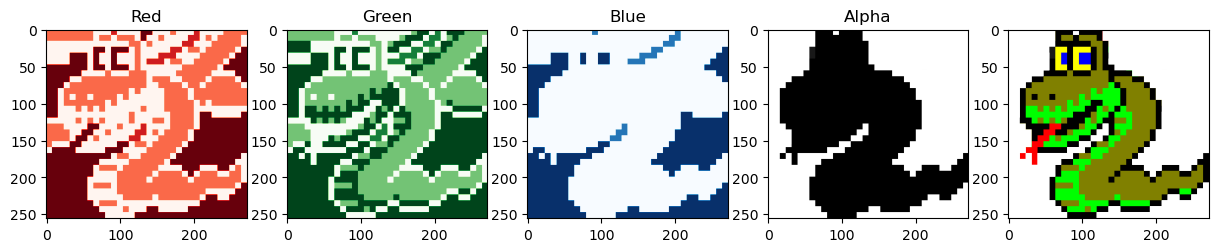

In [21]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=5)

ch = ['Red', 'Green', 'Blue', 'Alpha']
cm = ['Reds', 'Greens', 'Blues', 'binary']

for i, ax_i in enumerate(ax[:-1]):
    ax_i.imshow(old_python[:,:,i], cmap=cm[i])
    ax_i.set_title(ch[i])

ax[-1].imshow(old_python)

plt.show()

## 행렬곱

- 앞서 설명한 행렬곱의 형태는 가장 기본적으로 행렬곱을 설명하는 방식

- 여기서는 동일한 행렬곱을 세 가지 다른 시각으로 설명함

- 결국 같은 연산이지만 이렇게 다른 의미를 부여하여 이해하기 힘들고 이런 방식으로 행렬곱을 이해하면 강의 후반에 선형회귀 식을 정리하거나 인공신경망의 역전파 공식을 이해하는데 매우 큰 도움이 됨

### 열 결합

- 행렬곱은 앞에서 곱해지는 행렬의 열들을 뒤에서 곱해지는 열의 숫자로 선형결합하여 결과 열을 만드는 방식으로 설명 가능

In [125]:
A = np.random.randint(1,10,12).reshape(4,3)
b = np.random.randint(1,10,3)

print(f"A:\n{A}\nb:\n{b}")
print(f"size A:{A.shape}\nsize b:{b.shape}")
print(f"size A*b: {(np.dot(A,b)).shape}\nA*b:\n{np.dot(A,b)}")

A:
[[8 9 6]
 [1 2 2]
 [4 4 7]
 [9 8 5]]
b:
[4 5 4]
size A:(4, 3)
size b:(3,)
size A*b: (4,)
A*b:
[101  22  64  96]


In [126]:
# Create empty matrix and compute Matrix multiplcation
c = np.zeros(4, dtype=int)

for i in range(A.shape[1]):
    c +=  A[:, i]*b[i]

c

array([101,  22,  64,  96])

In [127]:
A.shape[1]

3

In [128]:
A[:,0]

array([8, 1, 4, 9])

In [129]:
b[0]

4

In [130]:
A[:,0]*b[0]

array([32,  4, 16, 36])

In [131]:
A[:,1]*b[1]

array([45, 10, 20, 40])

In [132]:
A = np.random.randint(1,10,12).reshape(4,3)
B = np.random.randint(1,10,6).reshape(3,2)
print(A,A.shape)
print('\n')
print(B,B.shape)
np.dot(A,B),np.dot(A,B).shape

[[2 9 4]
 [2 6 1]
 [9 8 8]
 [2 2 3]] (4, 3)


[[9 6]
 [3 2]
 [5 4]] (3, 2)


(array([[ 65,  46],
        [ 41,  28],
        [145, 102],
        [ 39,  28]]),
 (4, 2))

In [133]:
C = np.zeros((4,2))

for j in range(B.shape[1]):
    c = np.zeros(4, dtype=int)
    for i in range(A.shape[1]):
        c += A[:,i]*B[i,j]
        print(c)
    C[:,j] = c

print(C)

[18 18 81 18]
[ 45  36 105  24]
[ 65  41 145  39]
[12 12 54 12]
[30 24 70 16]
[ 46  28 102  28]
[[ 65.  46.]
 [ 41.  28.]
 [145. 102.]
 [ 39.  28.]]


### 행 결합

- 행렬곱은 뒤에서 곱해지는 행을 앞에서 곱해지는 행의 숫자로 선형결합하여 결과 행렬의 행을 만드는 방식으로 설명 가능

In [134]:
At = A.T
Bt = B.T

np.dot(Bt,At)

array([[ 65,  41, 145,  39],
       [ 46,  28, 102,  28]])

In [135]:
A.T.shape

(3, 4)

In [136]:
B.T.shape

(2, 3)

In [137]:
C = np.zeros((2,4))
for i in range(Bt.shape[0]):
    c = np.zeros(4, dtype=int)
    for j in range(At.shape[0]):
        c += Bt[i,j]*At[j,:]
    C[i,:]= c
print(C)

[[ 65.  41. 145.  39.]
 [ 46.  28. 102.  28.]]


### 외적합 (Outer Product)

- 행렬곱은 앞에서 곱해지는 행렬의 열과 뒤에서 곱해지는 행렬의 행을 외적하여 행렬을 만들고

- 이렇게 만들어진 행렬 여러 개를 모두 더하여 결과 행렬을 만드는 방식으로 설명 가능

- 예를 들어 (4,3) 행렬과 (3,2)행렬을 곱할 때 앞 행렬에서 길이 4짜리 열 3개가 있고 뒤 행렬에서 길이 2짜리 행 3개가 있게 됨

- 앞 행렬의 열과 뒤 행렬의 행을 짝지으면 세쌍이 되는데 이렇게 (3,1) 인 열과 (1,2)인 행을 행렬곱하면 (이렇게 하는 연산을 벡터의 외적이라 함) (3,2)인 행렬이 나오게 됨

- 이렇게 행렬만드는 연산을 세번 할 수 있고 결과로 얻어진 행렬 세 개를 모두 더하면 (이 행렬 세개는 (3,2)로 모양이 모두 같음) 결과 행렬이 얻어짐

In [143]:
A = np.random.randint(1,10,12).reshape(4,3)
B = np.random.randint(1,10,6).reshape(3,2)
print(A,A.shape)
print(B,B.shape)
print(f"A*B:\n{np.dot(A,B)}")
print(f"size: A*B: {np.dot(A,B).shape}")

[[5 4 4]
 [2 3 5]
 [4 6 4]
 [3 4 3]] (4, 3)
[[3 3]
 [5 4]
 [6 8]] (3, 2)
A*B:
[[59 63]
 [51 58]
 [66 68]
 [47 49]]
size: A*B: (4, 2)


In [141]:
C = np.zeros((4,2))

for j in range(A.shape[1]):
    C += np.dot(A[:,[j]], B[[j],:])


print(C)

[[16. 21.]
 [76. 59.]
 [62. 63.]
 [50. 47.]]
